In [53]:
import torch
from torch import nn
from torch import autograd as ag
from torch.autograd import Variable
from torch.utils import data
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

In [44]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv_layers= nn.Sequential(nn.Conv2d(1, 32, (3,3), padding=1),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2)),
                                 nn.Conv2d(32, 64, (3,3), padding=1),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2)))
        self.linear_layers = nn.Sequential(
                                 nn.Linear(3136, 100),
                                 nn.ReLU(),
                                 nn.Linear(100, 50),
                                 nn.ReLU(),
                                 nn.Linear(50, 2),
                                 nn.Softmax()
                                 # nn.MaxPool2d((2,2))
                                 )
    
    def forward(self, inp):
        conv_output = self.conv_layers(inp)
        return self.linear_layers(conv_output.view(conv_output.size(0), -1))

In [69]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(1, 128, (5, 5)), # 14
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, (5, 5)), # 18
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, (5, 5)), # 22
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, (3, 3)), # 24
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, (3, 3)), # 26
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, (3, 3)), # 28
        )
    
    def forward(self, z):
        return self.net(z)

In [95]:
# inp = Variable(torch.rand( 1, 1, 28, 28))
d = Discriminator()
num_epochs = 100
train_loader = data.DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([
                       transforms.ToTensor()])))
test_loader = data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                       transforms.ToTensor()])))

count =0
for batch, (train_data, target) in enumerate(train_loader):
    if count == 1000:
        break
    count +=1
    # print(" count : ", count)
    # print("train : ", train_data)
    # print("target : ", target)
    for epoch in range(num_epochs):
        output = d.forward(Variable(train_data))
        optimizer = optim.Adam(d.parameters())
        # target = Variable(target)
        # target_t = torch.zeros(1, 10)
        # print(target_t[0][target-1])
        # target_t[0][target] = 1
        target_t = torch.Tensor([[1, 0]])
        # print("size ", target.size())
        loss_obj = nn.MSELoss()
        loss = loss_obj(output, Variable(target_t))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(" epoch : ", epoch, "loss : ", loss.data[0])

In [96]:
g = Generator()
z = torch.rand(1, 1, 10, 10)
gen_epochs = 200
# print(g.forward(Variable(z)))
# print(len(train_loader[0]))
count = 0
for batch, (test_data, target) in enumerate(test_loader):
    if count >= 1000:
        break
    count += 1
    for epoch in range(gen_epochs):
        ce_loss = nn.CrossEntropyLoss()
        d_loss = ce_loss(d.forward(Variable(test_data)), Variable(torch.LongTensor([1])))
        z = Variable(torch.rand(1, 1, 10, 10))
        g_out = g.forward(z)
        # print(g_out)
        g_loss = ce_loss(d.forward(g_out), Variable(torch.LongTensor([1])))
        tot_loss = d_loss + g_loss
        optimizer_d = optim.SGD(d.parameters(), lr=1e-3)
        optimizer_g = optim.SGD(g.parameters(), lr=1e-4)
        optimizer_d.zero_grad()
        optimizer_g.zero_grad()
        tot_loss.backward()
        optimizer_d.step()
        optimizer_g.step()
        # optimizer_g = optim.SGD(g.parameters(), lr=1e-3)
        # g_loss = ce_loss(d.forward(g.forward(z)), Variable(torch.LongTensor(1)))
        # g_loss.backward()
        # optimizer_g.step()
        if epoch == 99:
            print(" batch : ", batch)
            print(" tot loss : ", tot_loss.data[0])

 batch :  0
 tot loss :  2.6263630390167236


 batch :  1
 tot loss :  2.6263608932495117


 batch :  2
 tot loss :  2.626352310180664


 batch :  3
 tot loss :  2.6263556480407715


 batch :  4
 tot loss :  2.626352548599243


 batch :  5
 tot loss :  2.626347064971924


 batch :  6
 tot loss :  2.6263468265533447


 batch :  7
 tot loss :  2.6263437271118164


 batch :  8
 tot loss :  2.626340627670288


 batch :  9
 tot loss :  2.6263375282287598


 batch :  10
 tot loss :  2.6263341903686523


 batch :  11
 tot loss :  2.626330852508545


 batch :  12
 tot loss :  2.626326560974121


 batch :  13
 tot loss :  2.6263232231140137


 batch :  14
 tot loss :  2.626317262649536


 batch :  15
 tot loss :  2.626315116882324


 batch :  16
 tot loss :  2.6263113021850586


 batch :  17
 tot loss :  2.6263065338134766


 batch :  18
 tot loss :  2.626302719116211


 batch :  19
 tot loss :  2.626296043395996


 batch :  20
 tot loss :  2.6262927055358887


 batch :  21
 tot loss :  2.6262874603271484


 batch :  22
 tot loss :  2.626282215118408


 batch :  23
 tot loss :  2.626277208328247


 batch :  24
 tot loss :  2.6262693405151367


 batch :  25
 tot loss :  2.626265525817871


 batch :  26
 tot loss :  2.62625789642334


 batch :  27
 tot loss :  2.6262521743774414


 batch :  28
 tot loss :  2.626246452331543


 batch :  29
 tot loss :  2.6262340545654297


 batch :  30
 tot loss :  2.6262311935424805


 batch :  31
 tot loss :  2.626211643218994


 batch :  32
 tot loss :  2.6262154579162598


 batch :  33
 tot loss :  2.626206874847412


 batch :  34
 tot loss :  2.626197338104248


 batch :  35
 tot loss :  2.626188278198242


 batch :  36
 tot loss :  2.6261773109436035


 batch :  37
 tot loss :  2.626157760620117


 batch :  38
 tot loss :  2.626155376434326


 batch :  39
 tot loss :  2.6261396408081055


 batch :  40
 tot loss :  2.626099109649658


 batch :  41
 tot loss :  2.6261134147644043


 batch :  42
 tot loss :  2.626101016998291


 batch :  43
 tot loss :  2.6260833740234375


 batch :  44
 tot loss :  2.626068115234375


 batch :  45
 tot loss :  2.6260509490966797


 batch :  46
 tot loss :  2.626028537750244


 batch :  47
 tot loss :  2.6260104179382324


 batch :  48
 tot loss :  2.6259899139404297


 batch :  49
 tot loss :  2.625964641571045


 batch :  50
 tot loss :  2.625936985015869


 batch :  51
 tot loss :  2.6259117126464844


 batch :  52
 tot loss :  2.6258814334869385


 batch :  53
 tot loss :  2.625845432281494


 batch :  54
 tot loss :  2.6258111000061035


 batch :  55
 tot loss :  2.6257691383361816


 batch :  56
 tot loss :  2.625723123550415


 batch :  57
 tot loss :  2.625627279281616


 batch :  58
 tot loss :  2.625609874725342


 batch :  59
 tot loss :  2.6255297660827637


 batch :  60
 tot loss :  2.6254725456237793


 batch :  61
 tot loss :  2.625389575958252


 batch :  62
 tot loss :  2.6252646446228027


 batch :  63
 tot loss :  2.6251697540283203


 batch :  64
 tot loss :  2.62503719329834


 batch :  65
 tot loss :  2.624814987182617


 batch :  66
 tot loss :  2.624666690826416


 batch :  67
 tot loss :  2.6244125366210938


 batch :  68
 tot loss :  2.6241073608398438


 batch :  69
 tot loss :  2.6237003803253174


 batch :  70
 tot loss :  2.6231236457824707


 batch :  71
 tot loss :  2.6223697662353516


 batch :  72
 tot loss :  2.621192455291748


 batch :  73
 tot loss :  2.619229316711426


 batch :  74
 tot loss :  2.614382266998291


 batch :  75
 tot loss :  2.6050729751586914


 batch :  76
 tot loss :  2.5571236610412598


 batch :  77
 tot loss :  0.8024200201034546


 batch :  78
 tot loss :  0.6633090972900391


 batch :  79
 tot loss :  0.6448723077774048


 batch :  80
 tot loss :  0.6386491060256958


 batch :  81
 tot loss :  0.6347925662994385


 batch :  82
 tot loss :  0.6327608227729797


 batch :  83
 tot loss :  0.6316505074501038


 batch :  84
 tot loss :  0.6306142807006836


 batch :  85
 tot loss :  0.6299906969070435


 batch :  86
 tot loss :  0.6295453310012817


 batch :  87
 tot loss :  0.6291459202766418


 batch :  88
 tot loss :  0.6288537979125977


 batch :  89
 tot loss :  0.6286616325378418


 batch :  90
 tot loss :  0.628399133682251


 batch :  91
 tot loss :  0.6282444000244141


 batch :  92
 tot loss :  0.6281161308288574


 batch :  93
 tot loss :  0.6279631853103638


 batch :  94
 tot loss :  0.6278784275054932


 batch :  95
 tot loss :  0.6277644634246826


 batch :  96
 tot loss :  0.6277391910552979


 batch :  97
 tot loss :  0.6276105642318726


 batch :  98
 tot loss :  0.6275485157966614


 batch :  99
 tot loss :  0.6274897456169128


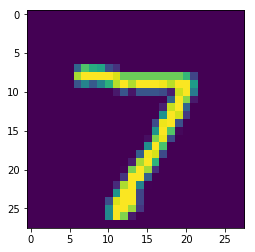

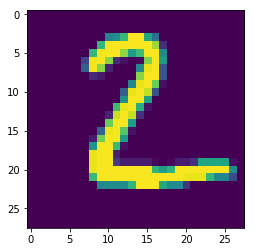

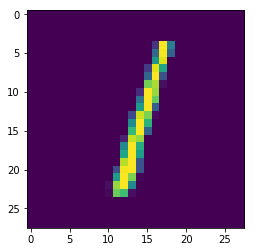

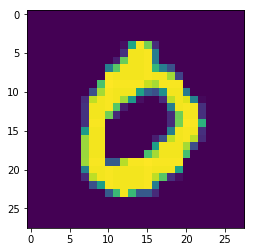

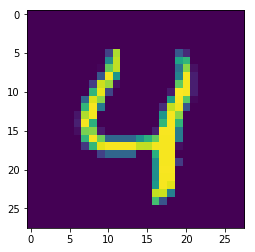

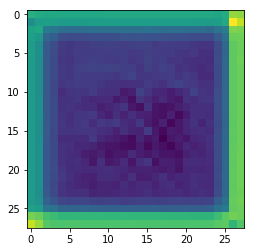

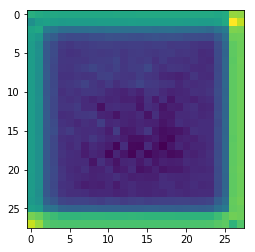

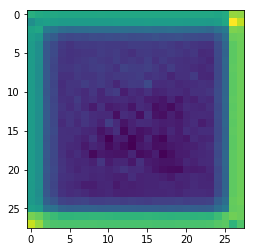

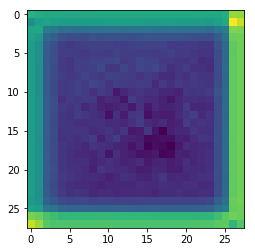

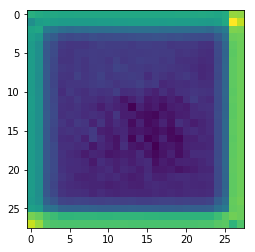

In [112]:
num_images = 5
count = 0
for batch, (train_data, target) in enumerate(test_loader):
    if count==num_images:
        break
    pt.imshow(train_data.numpy()[0][0])
    pt.show()
    count+=1
    
for i in range(num_images):
    z = Variable(torch.rand(1, 1, 10, 10))
    img = g(z)
    img = img.data.numpy()
    # img = img.reshape(28, 28)
    pt.imshow(img[0][0])
    pt.show()
    # print(i, "\n")